##### Import libraries

In [89]:
import sys
import os
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

##### Set threshold

In [2]:
#np.set_printoptions(threshold = sys.maxsize)
np.set_printoptions(threshold = 10000)

##### Import EEG data 

In [101]:
type(mat)

dict

In [3]:
mat = scipy.io.loadmat('LineFreeEEG_Rest.mat')
LineFreeEEG_Rest = pd.DataFrame(mat['LineFreeEEG_Rest'])

##### Remove headers

In [4]:
#S /= S.std(axis=0)  # Standardize data
# Mix data
X1 = LineFreeEEG_Rest.values[:,:].transpose()   # Generate observations
X = X1[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
X /= X.std(axis = 0)

In [115]:
ecog_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Jun  7 14:05:31 2018',
 '__version__': '1.0',
 '__globals__': [],
 'ECoG': array([[-104, -118, -118, ...,  -19,  -13,  -15],
        [  11,  -53,  -43, ...,  -21,   -5,   25],
        [ 177,  148,  126, ..., -131, -125, -135],
        ...,
        [-238, -232, -220, ...,  288,  293,  270],
        [ 103,   84,  107, ...,  -55,  -61,  -66],
        [-140, -172, -173, ...,   57,   65,   57]], dtype=int16)}

##### Import ECOG data 

In [112]:
ecog_mat['ECoG']

array([[-104, -118, -118, ...,  -19,  -13,  -15],
       [  11,  -53,  -43, ...,  -21,   -5,   25],
       [ 177,  148,  126, ..., -131, -125, -135],
       ...,
       [-238, -232, -220, ...,  288,  293,  270],
       [ 103,   84,  107, ...,  -55,  -61,  -66],
       [-140, -172, -173, ...,   57,   65,   57]], dtype=int16)

In [113]:
ecog_mat = scipy.io.loadmat('ECoG_rest.mat')
ECoG_Rest = pd.DataFrame(ecog_mat['ECoG'])

In [116]:
ECoG_Rest.transpose()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-104,11,177,351,-32,-23,46,-96,-146,69,...,21,86,-313,-698,-78,-156,-218,-238,103,-140
1,-118,-53,148,326,-29,-10,89,-125,-175,61,...,28,88,-344,-718,-71,-148,-251,-232,84,-172
2,-118,-43,126,332,-4,17,131,-91,-137,83,...,21,114,-333,-692,-68,-151,-234,-220,107,-173
3,-79,-27,136,369,-17,47,147,-52,-107,117,...,28,107,-313,-694,-98,-178,-237,-205,59,-178
4,-44,-34,129,374,-41,31,112,-23,-64,117,...,51,133,-299,-671,-81,-185,-255,-175,32,-167
5,-12,-34,128,366,-73,27,51,-2,-94,108,...,93,142,-261,-638,-100,-188,-235,-162,5,-156
6,6,-9,121,363,-94,-23,5,6,-84,111,...,71,88,-249,-618,-112,-184,-205,-159,2,-194
7,47,34,140,359,-83,-53,-13,-2,-66,117,...,105,88,-188,-578,-59,-148,-186,-146,17,-160
8,66,84,153,353,-97,-59,3,17,-68,89,...,131,94,-141,-547,-21,-102,-147,-131,-3,-125
9,89,114,152,335,-141,-77,2,61,-54,97,...,138,62,-176,-513,-24,-95,-92,-135,11,-55


In [ ]:
X2 = LineFreeEEG_Rest.values[:,:].transpose()   # Generate observations
X = X1[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
X /= X.std(axis = 0)

##### Mix data

In [4]:
#S /= S.std(axis=0)  # Standardize data
# Mix data
X1 = LineFreeEEG_Rest.values[:,:].transpose()   # Generate observations
X = X1[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
X /= X.std(axis = 0)

##### Print X

In [5]:
print(X)

[[ -7.71811875  -1.41351529  -5.28175831 ...  24.38347193   6.02958344
    4.23339495]
 [ -7.56717957  -1.38503694  -5.10759142 ...  24.21710381   6.05866046
    4.18806224]
 [ -7.44447058  -1.34842684  -4.98603072 ...  24.2128197    6.07288782
    4.23518298]
 ...
 [-11.13288677  -4.44004287  -8.89284988 ...  24.72224803  -0.79836548
    2.87325959]
 [-11.07852252  -4.41548385  -8.82066911 ...  24.87486828  -0.76684312
    2.9068699 ]
 [-11.06215387  -4.41401027  -8.80263733 ...  24.8550378   -0.77362435
    2.90116979]]


##### Print X.shape

In [6]:
print(X.shape)

(300000, 16)


##### Set variables

In [33]:
ica = FastICA(n_components = 16)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
j = ica.inverse_transform(S_)

##### Plot

<Figure size 432x288 with 0 Axes>

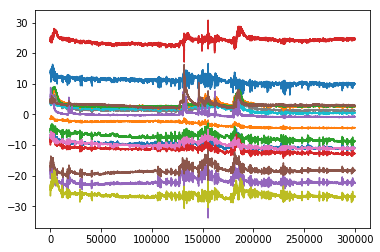

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(j)
plt.figure()

##### Set variables

In [35]:
models = [X, S_]
names = ['Observations (mixed signal EEG)',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange','blue','pink', 'grey', 'brown', 'purple', 'violet', 'aqua', 'gold', 'indigo', 'black', 'green', 'yellow']

##### Plot

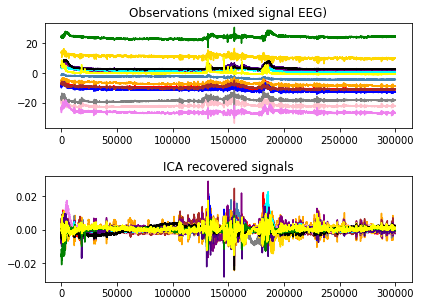

In [36]:
for i, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(2, 1, i)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

# resize
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

In [90]:
fast_ICA_correlation = np.dot(X_short, S_short)

##### Plot

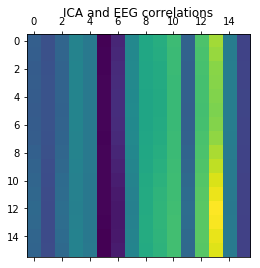

In [94]:
plt.matshow(fast_ICA_correlation)
plt.title('ICA and EEG correlations')
plt.show()

In [ ]:
plt.matshow(fast_ICA_correlation)
plt.show()

In [46]:
X.shape

(300000, 16)

In [47]:
S_.shape

(300000, 16)

In [48]:
X_df = pd.DataFrame(data = X)

In [51]:
S_df = pd.DataFrame(data = S_)

In [77]:
S_short = S_[0:16,:]

In [79]:
X_short = X[0:16,:]

In [70]:
X_df = pd.DataFrame(data = X_short)

In [118]:
C = xcorr2(X_df, S_df)

NameError: name 'xcorr2' is not defined